In [24]:
import pandas as pd
import numpy as np
import wave
from scipy.io.wavfile import read
import matplotlib.pyplot as plt
from psds_eval import PSDSEval

In [2]:
reference = pd.read_csv('../data/test.csv')
prediction = pd.read_csv('../predictions/jannes/Prediction2d_pp_test.csv')
labels = ['Bark', 'Burping_and_eructation', 'Camera', 'Cheering', 'Church_bell', 'Cough', 'Doorbell', 'Fireworks', 'Meow', 'Scratching_(performance_technique)', 'Shatter', 'Shout']
colors = ['red','green', 'orange', 'violet', 'blue', 'darkgreen', 'turquoise', 'darkblue', 'brown', 'darkred', 'gray', 'lightblue']
fs = 16000

In [3]:
def score_all(hyp_data, ref_data):
    # as the unique files are the same, only one unique call is enough
    metadata = pd.DataFrame(np.unique(hyp_data['filename']), columns=['filename'])
    metadata = metadata.assign(duration=10)

    psds_eval = PSDSEval(ground_truth=ref_data, metadata=metadata)
    info = {"threshold": 0.5}
    psds_eval.add_operating_point(hyp_data, info=info)
    return psds_eval.psds(max_efpr=100).value

0.75
Reference
Cheering
Meow
Camera
Burping_and_eructation

Prediction
Cheering
Meow
Camera
Burping_and_eructation


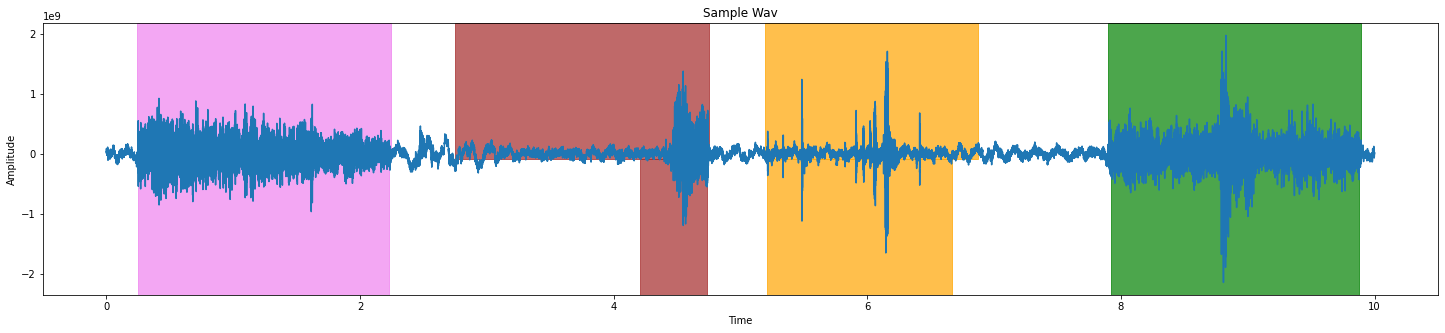

In [23]:
file = "09019_mix.wav"
referenceLabel = reference.loc[reference["filename"]==file]
predictionLabel = prediction.loc[prediction["filename"]==file]

plt.figure(figsize=(25,5))
# read audio samples
input_data = read("../data/final_pre_dataset/dev/"+file)
audio = input_data[1]
time=np.linspace(0, len(audio)/fs, num=len(audio))
plt.plot(time,audio)
plt.ylabel("Amplitude")
plt.xlabel("Time")
plt.title("Sample Wav")

print(score_all(predictionLabel, referenceLabel))

print("Reference")
for index,row in referenceLabel.iterrows():
    plt.axvspan(row['onset'], row['offset'], alpha=0.7, color=colors[labels.index(row['event_label'])], ymin=0.5, ymax=1)
    print(row["event_label"])
print("\nPrediction")
for index,row in predictionLabel.iterrows():
    plt.axvspan(row['onset'], row['offset'], alpha=0.7, color=colors[labels.index(row['event_label'])], ymin=0, ymax=0.5)
    print(row["event_label"])
plt.show()


# Challenge-Prediction visualisieren

Burping_and_eructation
Shatter
Church_bell
Cheering

Challenge Prediction 2
Burping_and_eructation  0.9968560189008712
Shatter  0.9903348073363304
Cheering  0.9827697513959348

Challenge Prediction 3
Burping_and_eructation  0.997179742042835
Cheering  0.9469734804752544


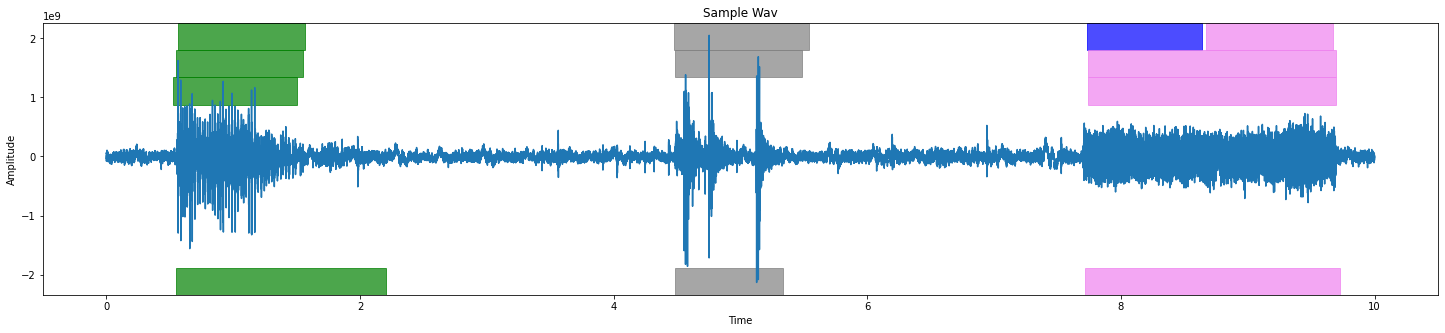

In [117]:
file = "11259_mix.wav"

chalPrediction1 = pd.read_csv('../submissions/submission01/LP1d_PredictionChallenge.csv')
label1 = chalPrediction1.loc[chalPrediction1["filename"]==file]

chalPrediction2 = pd.read_csv('../submissions/submission03/2d_PredictionChallenge_mel.csv')
label2 = chalPrediction2.loc[chalPrediction2["filename"]==file]

chalPrediction3 = pd.read_csv('../submissions/submission07/challenge_submission_t08n03b2.csv')
label3 = chalPrediction3.loc[chalPrediction3["filename"]==file]

chalPrediction4 = pd.read_csv('../predictions/jannes/2d_Classification_ChallengeWithSecondLikely.csv')
label4 = chalPrediction4.loc[chalPrediction4["filename"]==file]

plt.figure(figsize=(25,5))
# read audio samples
input_data = read("../data/final_pre_dataset/eval/"+file)
audio = input_data[1]
time=np.linspace(0, len(audio)/fs, num=len(audio))
plt.plot(time,audio)
plt.ylabel("Amplitude")
plt.xlabel("Time")
plt.title("Sample Wav")

#print("Challenge Prediction 1")
for index,row in label1.iterrows():
    plt.axvspan(row['onset'], row['offset'], alpha=0.7, color=colors[labels.index(row['event_label'])], ymin=0.9, ymax=1)
    print(row["event_label"])
print("\nChallenge Prediction 2")
for index,row in label2.iterrows():
    plt.axvspan(row['onset'], row['offset'], alpha=0.7, color=colors[labels.index(row['event_label'])], ymin=0.8, ymax=0.9)
    print(row["event_label"] + "  "+ str(row["MeanProb"]))
print("\nChallenge Prediction 3")
for index,row in label3.iterrows():
    plt.axvspan(row['onset'], row['offset'], alpha=0.7, color=colors[labels.index(row['event_label'])], ymin=0.7, ymax=0.8)
    #plt.axvspan(row['onset'], row['offset'], alpha=0.7, color=colors[labels.index(row['secondLikely_label'])], ymin=0.7, ymax=0.75)
    print(row["event_label"] + "  "+ str(row["MeanProb"]))
    #print(row["secondLikely_label"])
    
for index,row in label4.iterrows():
    plt.axvspan(row['onset'], row['offset'], alpha=0.7, color=colors[labels.index(row['event_label'])], ymin=0, ymax=0.1)
plt.show()

# Challenge-Daten mit mehreren Labeln pro Sequenz

Shout
Church_bell
Church_bell
Cheering
Meow
Camera
Doorbell


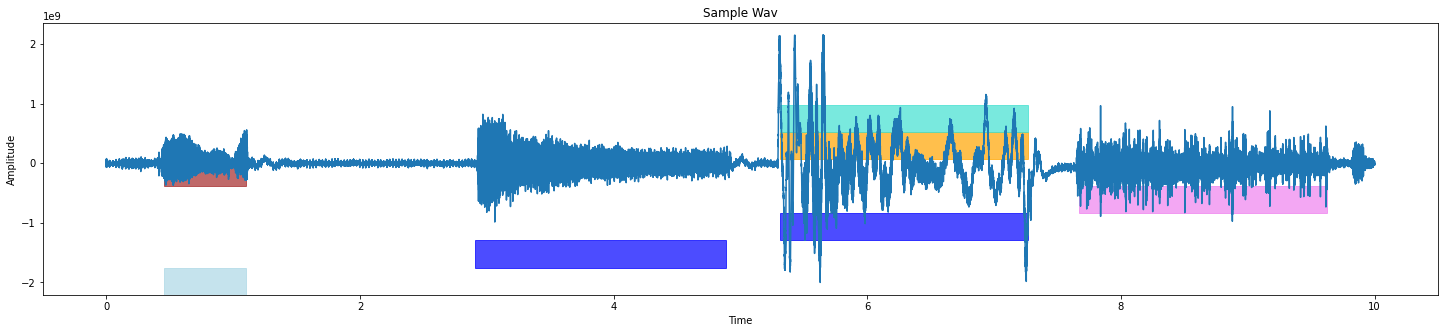

In [90]:
file = "11219_mix.wav"

chalPrediction1 = pd.read_csv("../predictions/jannes/majorityVoteChallengeMultiple.csv")
label1 = chalPrediction1.loc[chalPrediction1["filename"]==file]

plt.figure(figsize=(25,5))
# read audio samples
input_data = read("../data/final_pre_dataset/eval/"+file)
audio = input_data[1]
time=np.linspace(0, len(audio)/fs, num=len(audio))
plt.plot(time,audio)
plt.ylabel("Amplitude")
plt.xlabel("Time")
plt.title("Sample Wav")

rows = label1.values.shape[0]
ymin=0
for index,row in label1.iterrows():
    ymax = ymin+0.1
    plt.axvspan(row['onset'], row['offset'], alpha=0.7, color=colors[labels.index(row['event_label'])], ymin=ymin, ymax=ymax)
    print(row["event_label"])
    ymin = ymin+0.1